Author: Connor Finn <br>
Date: May 28, 2020 <br>

This is a script used to work with the google earth engine api

In [245]:
import ee          # pip install 
from IPython.display import Image
import folium

# Trigger the authentication flow.
ee.Authenticate()


Enter verification code: 4/0QHBeusHOe0Fu3BFHNEy5YhPZKWAAsG28QlLRP00IniRbGApk6h9qsA

Successfully saved authorization token.


Note: origionally the authenticate function worked only on google collab (i.e. not locally) to resolve this, i read this [stack_overflow](https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org) article.

## Image Visualization
This [documentation](https://developers.google.com/earth-engine/image_info) is used for this section.

In [246]:
ee.Initialize()
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044035_20140318') # SF Bay area again
ndwi = image.normalizedDifference(['B3', 'B5'])  #Compute ND water index

In [247]:
image = ee.Image('LANDSAT/LC08/C01/T1/LC08_044034_20140318')
bands = image.bandNames()
bands.getInfo()

['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'BQA']

## Map_Display class ~ interact with API

In [248]:
# I would Like to make my own class for this.
class Map_Display():

    def __init__(self , location , zoom , height  ):
      self.m =  folium.Map(location= location , zoom_start = zoom)


    def add_ee_layer(self, ee_image_object, vis_params, name):
        map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
        folium.raster_layers.TileLayer(
        tiles = map_id_dict['tile_fetcher'].url_format,
        attr = "Map Data © Google Earth Engine",
        name = name,
        overlay = True,
        control = True
        ).add_to(self.m)

    def add_child(self , child_object):
      self.m.add_child(child_object)

    def show_map(self):
      display(self.m)

# Test it out
md = Map_Display([37.2, -121] , zoom = 8 , height = 500)

image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

ndwi = image.normalizedDifference(['B3', 'B5'])  # Water index
ndvi = image.normalizedDifference(['B5', 'B4'])  # Land index

# Set visualization parameters.
vis_params_W = {
  'min': 0.5,
  'max': 1.0,
  'palette': ['00FFFF', '0000FF']}

vis_params_V = {
  'min': -1,
  'max': 1,
  #'palette': ['#d73027', '#f46d43', '#fdae61','#fee08b', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850']
  #'palette': ['blue', 'white', 'green']
    'palette': ['blue' , 'white' , 'green']
  }


# # Add the water index model to the map object.
md.add_ee_layer(ndwi.updateMask(ndwi.gt(0)), vis_params_W, 'NDWI')

# # Add the vegetation index model to the map object.
md.add_ee_layer(ndvi, vis_params_V, 'NDVI')


# # Add a layer control panel to the map.
#md.add_child(folium.LayerControl())

new = ee.Image('LANDSAT/LC08/C01/T1/LC08_044034_20140318').select('B8')

# path 44, row 34 -> 3 digits for each!!

# edge detection using the ee provided kernel
canny = ee.Algorithms.CannyEdgeDetector(image = new, threshold = 100, sigma= 1)  # perform edge detection
hough = ee.Algorithms.HoughTransform(canny, 256, 600, 100)  # extracts lines from the canny result
#md.add_ee_layer(hough, {}, 'hough')



md.show_map()


# Get a range of image objects

In [249]:
def get_images(path_list , row_list , satelite , start_date , end_date , max_cloud_percentage):
    
    # get image collection object
    coll = ee.ImageCollection(satelite)\
        .filterDate(start_date, end_date)\
        .filter(ee.Filter.inList('WRS_PATH', path_list))\
        .filter(ee.Filter.inList('WRS_ROW', row_list))\
        .filter(ee.Filter.lt('CLOUD_COVER' , max_cloud_percentage))  # note ~ not less than or equal to

    # get image_id's
    image_ids = list( map( lambda x : x['id'] , coll.getInfo()['features'] ) ) 
    
    # get image objects
    images = list( map( lambda x: ee.Image(x) , image_ids ) )
    
    return images


In [250]:
# Try it out
p = [44 , 45]
r = [33 , 34]
sat = 'LANDSAT/LC08/C01/T1'
sd = '2013-05-01'
ed = '2019-05-01'
cc = 25
image_list = get_images(p , r , sat , sd , ed , cc)

In [279]:
image_one = image_list[0]



{'type': 'Image',
 'bands': [{'id': 'max',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:32610',
   'crs_transform': [30, 0, 498885, 0, -30, 4416615]}],
 'properties': {'system:footprint': {'type': 'LinearRing',
   'coordinates': [[-122.55775597448536, 38.215318305737675],
    [-121.57085949587822, 38.02860747798267],
    [-120.89584870810809, 37.895587559382875],
    [-120.89410701327499, 37.89555636763877],
    [-120.87612595011385, 37.95211073744802],
    [-120.76856043025002, 38.28992665697962],
    [-120.60625070849088, 38.79558195658174],
    [-120.46890557706466, 39.21960165060856],
    [-120.38404918098745, 39.48286081918113],
    [-120.38225237499138, 39.48890369198882],
    [-120.38103599240829, 39.49334878452604],
    [-120.380970648129, 39.49508902147305],
    [-120.42058521641712, 39.5028906369411],
    [-121.07960215160229, 39.63038668139602],
    [-122.50393591321445, 39.89172052693834],
    [-122.540740008

(array([6.000e+01, 6.580e+02, 2.632e+03, 4.344e+03, 1.459e+03, 4.590e+02,
        1.840e+02, 1.490e+02, 2.900e+01, 1.000e+00]),
 array([-0.58922978, -0.49635854, -0.4034873 , -0.31061606, -0.21774482,
        -0.12487358, -0.03200234,  0.0608689 ,  0.15374013,  0.24661137,
         0.33948261]),
 <a list of 10 Patch objects>)

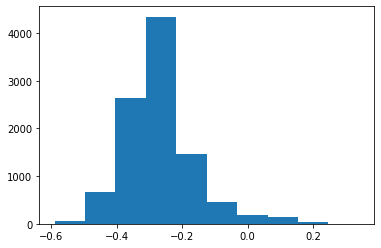

In [261]:
image = image_list[0]
ndwi = image.normalizedDifference(['B3', 'B5'])  #Compute ND water index

ndwi_dict = ndwi.sample(numPixels = 10000).reduceColumns(ee.Reducer.toList().repeat(1), ['nd'])
ndwi_list = ee.List(ndwi_dict.get('list'))
ndwi_data = ndwi_list.getInfo()

import matplotlib.pyplot as plt
plt.hist(ndwi_data[0])

# Working with Geometries

In [269]:
# Create a  polygon.
baltimore_polygon = ee.Geometry.Polygon([ [-76.56500513879297,39.23125134622654] , [-76.64740259973047,39.234442525841544] \
, [-76.65014918176172,39.29265605735468] , [-76.5608852657461,39.29717289363387] ] )

In [272]:
md3 = Map_Display([37.2, -121] , zoom = 8 , height = 500)
md.add_ee_layer(baltimore_polygon, , 'bmore')
md3.show_map()

NameError: name 'color' is not defined

# Investigating ImageCollectionObjects

In [126]:
coll.getInfo().keys()

dict_keys(['type', 'bands', 'id', 'version', 'properties', 'features'])

In [241]:

coll.getInfo().keys()
coll.getInfo()['features'][0].keys()


type(coll.getInfo()['features'][0]['bands'])

coll.getInfo()['features'][0]['bands'][0]
#coll.getInfo()['features'][0].keys()

#coll.getInfo()['features'][0]['properties'].keys()


#coll.getInfo()['features'][0]['properties']


{'id': 'B1',
 'data_type': {'type': 'PixelType',
  'precision': 'int',
  'min': 0,
  'max': 65535},
 'dimensions': [7571, 7371],
 'crs': 'EPSG:32610',
 'crs_transform': [30, 0, 462585, 0, -30, 4257915]}